In [65]:
import tensorflow as tf
from keras import layers, models
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from keras import regularizers
from keras import optimizers

# Building NN model

In [66]:
def leaky_relu(x):
    return tf.nn.leaky_relu(x, alpha=0.2)

input_shape = 300
output_shape = 6
model = models.Sequential()
model.add(layers.Dense(250, activation='relu', input_shape=(300,)))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(output_shape, activation='softmax')) 

sgd = optimizers.SGD(learning_rate=0.1)



In [67]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 100)               30100     
                                                                 
 dense_23 (Dense)            (None, 100)               10100     
                                                                 
 dropout_7 (Dropout)         (None, 100)               0         
                                                                 
 dense_24 (Dense)            (None, 100)               10100     
                                                                 
 dropout_8 (Dropout)         (None, 100)               0         
                                                                 
 dense_25 (Dense)            (None, 6)                 606       
                                                                 
Total params: 50906 (198.85 KB)
Trainable params: 5090

# Load Data

In [68]:
X_train = np.load('Data/Vectors/X_train.npy')
Y_train = np.load('Data/Vectors/Y_train.npy') #[:, :3]
X_test = np.load('Data/Vectors/X_test.npy')
Y_test = np.load('Data/Vectors/Y_test.npy') #[:, :3]
X_validation = np.load('Data/Vectors/X_validate.npy')
Y_validation = np.load('Data/Vectors/Y_validate.npy') #[:, :3]

# Train

Epoch 1/50
6250/6250 [==============================] - 8s 1ms/step - loss: 1.3255 - accuracy: 0.4066 - val_loss: 1.3141 - val_accuracy: 0.4181
Epoch 2/50
6250/6250 [==============================] - 7s 1ms/step - loss: 1.3261 - accuracy: 0.4061 - val_loss: 1.3111 - val_accuracy: 0.4129
Epoch 3/50
6250/6250 [==============================] - 7s 1ms/step - loss: 1.3257 - accuracy: 0.4068 - val_loss: 1.3135 - val_accuracy: 0.4197
Epoch 4/50
6250/6250 [==============================] - 8s 1ms/step - loss: 1.3252 - accuracy: 0.4070 - val_loss: 1.3190 - val_accuracy: 0.4199
Epoch 5/50
6250/6250 [==============================] - 9s 1ms/step - loss: 1.3249 - accuracy: 0.4074 - val_loss: 1.3145 - val_accuracy: 0.4124
Epoch 6/50
6250/6250 [==============================] - 23s 4ms/step - loss: 1.3249 - accuracy: 0.4058 - val_loss: 1.3159 - val_accuracy: 0.4167
Epoch 7/50
6250/6250 [==============================] - 26s 4ms/step - loss: 1.3248 - accuracy: 0.4065 - val_loss: 1.3247 - val_accurac

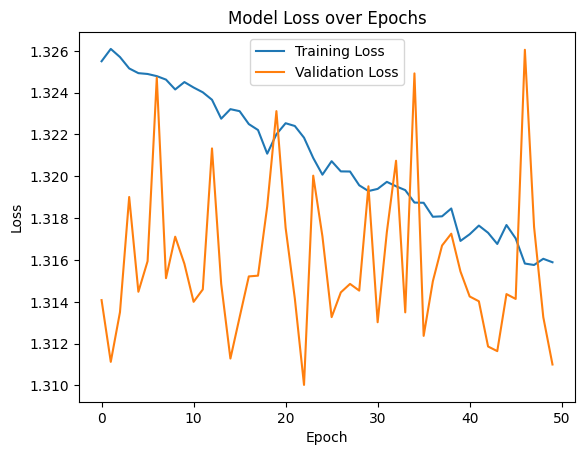

In [74]:
history = model.fit(X_train, Y_train, epochs=50, batch_size=32, validation_data=(X_validation, Y_validation))

# Plotting the training and validation loss values
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')

# Adding title and labels to the plot
plt.title('Model Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [70]:
# Save the model
SAVE = False
if SAVE:
    model.save('my_model') 

# Evaluate

In [71]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')

782/782 [==============================] - 2s 2ms/step - loss: 1.3242 - accuracy: 0.3944
Loss: 1.3241605758666992, Accuracy: 0.3944000005722046


# Confusion Matrix

782/782 [==============================] - 2s 2ms/step


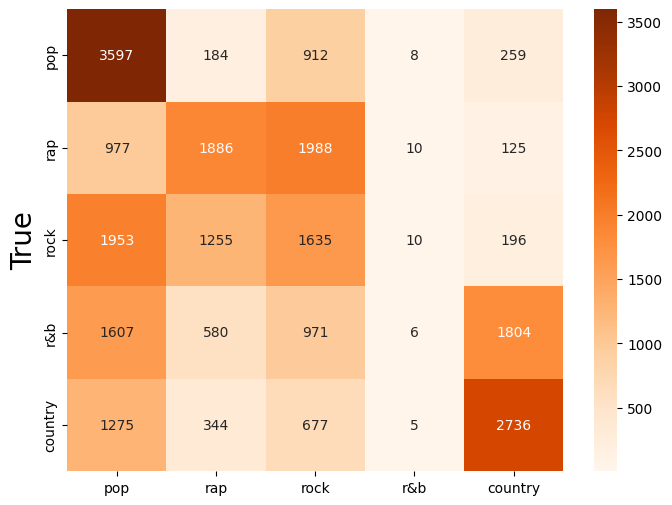

In [72]:

Y_pred = model.predict(X_test)

# Convert one-hot encoded vectors back to categorical values
Y_test_categorical = np.argmax(Y_test, axis=1)
Y_pred_categorical = np.argmax(Y_pred, axis=1)

# Create a confusion matrix
cm = confusion_matrix(Y_test_categorical, Y_pred_categorical)

# Visualize the confusion matrix using seaborn and matplotlib
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', xticklabels=['pop','rap', 'rock', 'r&b', 'country'], yticklabels=['pop','rap', 'rock', 'r&b', 'country'])
plt.ylabel('True', fontsize=20)
plt.show()


Accuracy: 0.3944
Precision: [0.38229355 0.44386915 0.26443474 0.15384615 0.534375  ]
Recall: [0.72520161 0.37825913 0.3238265  0.00120773 0.54318046]
F1-Score: [0.50066115 0.40844613 0.29113248 0.00239664 0.53874175]


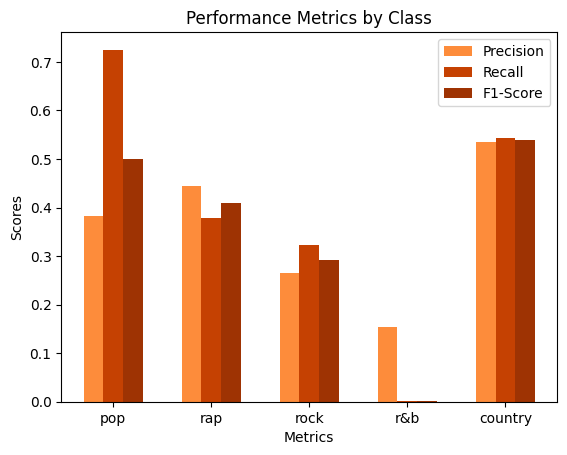

In [73]:
# Assuming you have predicted values stored in 'Y_pred_categorical' and true labels stored in 'Y_test_categorical'

# Accuracy
accuracy = accuracy_score(Y_test_categorical, Y_pred_categorical)
print(f"Accuracy: {accuracy}")

# Precision
precision = precision_score(Y_test_categorical, Y_pred_categorical, average=None)  # You can choose 'micro', 'macro', 'weighted', or 'samples' as per your requirement
print(f"Precision: {precision}")

# Recall
recall = recall_score(Y_test_categorical, Y_pred_categorical, average=None)  # You can choose 'micro', 'macro', 'weighted', or 'samples' as per your requirement
print(f"Recall: {recall}")

# F1-Score
f1 = f1_score(Y_test_categorical, Y_pred_categorical, average=None)  # You can choose 'micro', 'macro', 'weighted', or 'samples' as per your requirement
print(f"F1-Score: {f1}")



# Labels for the classes
classes = ['pop', 'rap', 'rock', 'r&b', 'country']

num_colors = 10

# Create the colormap
cmap = plt.get_cmap('Oranges')

# Generate the array of colors
colors = [cmap(i / num_colors) for i in range(num_colors)]

# Plotting Precision, Recall, and F1-Score
x = np.arange(len(classes))
width = 0.2

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, precision, width, label='Precision', color=colors[5])
rects2 = ax.bar(x, recall, width, label='Recall', color=colors[8])
rects3 = ax.bar(x + width, f1, width, label='F1-Score', color=colors[9])

ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Performance Metrics by Class')
ax.set_xticks(x)
ax.set_xticklabels(classes)
ax.legend()

plt.show()
